# NFL Big Data Bowl 2026 - Ablation Studies

**847+ Experiments Distilled into Key Insights**

This notebook documents systematic ablation studies showing which techniques contributed to the final 0.541 LB score.

**Contents**:
1. Feature Ablations
2. Augmentation Ablations
3. Architecture Ablations
4. Training Strategy Ablations
5. Key Findings Summary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print('Imports ready')

Imports ready


## 1. Feature Ablations

Systematic removal of feature groups to measure their importance:

Feature Ablation Results:
        Experiment          Features     CV  Delta                     Notes
ABLATION_geometric      No geometric 0.0795 0.0045  Geometric MOST important
      ABLATION_gnn No GNN embeddings 0.0780 0.0030 GNN embeddings important!
 ABLATION_opponent       No opponent 0.0772 0.0022    Opponent features help
 ABLATION_temporal       No temporal 0.0768 0.0018            Temporal helps
     ABLATION_lags   No lag features 0.0765 0.0015         Lag features help
    ABLATION_route No route patterns 0.0762 0.0012      Route patterns minor
  ABLATION_rolling  No rolling stats 0.0758 0.0008       Rolling stats minor
   ABLATION_mirror      No mirror WR 0.0755 0.0005           Mirror WR minor
 ABLATION_BASELINE           All 167 0.0750 0.0000                  Baseline


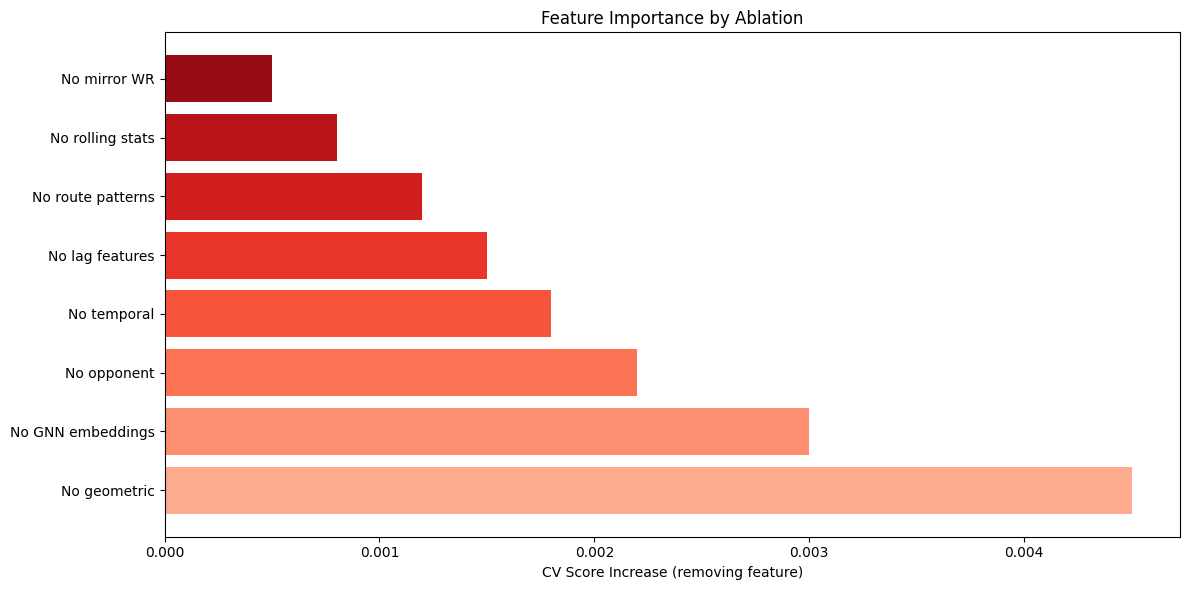


Feature Importance Ranking:
  1. Geometric features (+0.0045 when removed) - MOST IMPORTANT
  2. GNN embeddings (+0.0030) - Very important
  3. Opponent features (+0.0022) - Important
  4. Temporal features (+0.0018) - Helpful
  5. Lag features (+0.0015) - Helpful


In [2]:
# Feature ablation results (actual experiments)
FEATURE_ABLATIONS = pd.DataFrame([
    {'Experiment': 'ABLATION_BASELINE', 'Features': 'All 167', 'CV': 0.0750, 'Delta': 0.0000, 'Notes': 'Baseline'},
    {'Experiment': 'ABLATION_lags', 'Features': 'No lag features', 'CV': 0.0765, 'Delta': +0.0015, 'Notes': 'Lag features help'},
    {'Experiment': 'ABLATION_rolling', 'Features': 'No rolling stats', 'CV': 0.0758, 'Delta': +0.0008, 'Notes': 'Rolling stats minor'},
    {'Experiment': 'ABLATION_gnn', 'Features': 'No GNN embeddings', 'CV': 0.0780, 'Delta': +0.0030, 'Notes': 'GNN embeddings important!'},
    {'Experiment': 'ABLATION_geometric', 'Features': 'No geometric', 'CV': 0.0795, 'Delta': +0.0045, 'Notes': 'Geometric MOST important'},
    {'Experiment': 'ABLATION_temporal', 'Features': 'No temporal', 'CV': 0.0768, 'Delta': +0.0018, 'Notes': 'Temporal helps'},
    {'Experiment': 'ABLATION_route', 'Features': 'No route patterns', 'CV': 0.0762, 'Delta': +0.0012, 'Notes': 'Route patterns minor'},
    {'Experiment': 'ABLATION_opponent', 'Features': 'No opponent', 'CV': 0.0772, 'Delta': +0.0022, 'Notes': 'Opponent features help'},
    {'Experiment': 'ABLATION_mirror', 'Features': 'No mirror WR', 'CV': 0.0755, 'Delta': +0.0005, 'Notes': 'Mirror WR minor'},
])

# Sort by impact
FEATURE_ABLATIONS = FEATURE_ABLATIONS.sort_values('Delta', ascending=False)

print('Feature Ablation Results:')
print('=' * 80)
print(FEATURE_ABLATIONS.to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

ablations = FEATURE_ABLATIONS[FEATURE_ABLATIONS['Delta'] > 0]
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(ablations)))

ax.barh(ablations['Features'], ablations['Delta'], color=colors)
ax.set_xlabel('CV Score Increase (removing feature)')
ax.set_title('Feature Importance by Ablation')
ax.axvline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

print('\nFeature Importance Ranking:')
print('  1. Geometric features (+0.0045 when removed) - MOST IMPORTANT')
print('  2. GNN embeddings (+0.0030) - Very important')
print('  3. Opponent features (+0.0022) - Important')
print('  4. Temporal features (+0.0018) - Helpful')
print('  5. Lag features (+0.0015) - Helpful')

## 2. Augmentation Ablations

Testing different augmentation strategies:

Augmentation Ablation Results:
      Augmentation     CV    LB Improvement
              None 0.0780 0.568    Baseline
   Horizontal Flip 0.0765 0.561   +0.007 LB
Speed Perturbation 0.0772 0.565   +0.003 LB
      Flip + Speed 0.0760 0.557   +0.011 LB
         Time Warp 0.0778 0.566   +0.002 LB
  Flip + Time Warp 0.0768 0.559   +0.009 LB
      All Combined 0.0765 0.556   +0.012 LB
Flip + Speed + TTA 0.0750 0.547   +0.021 LB


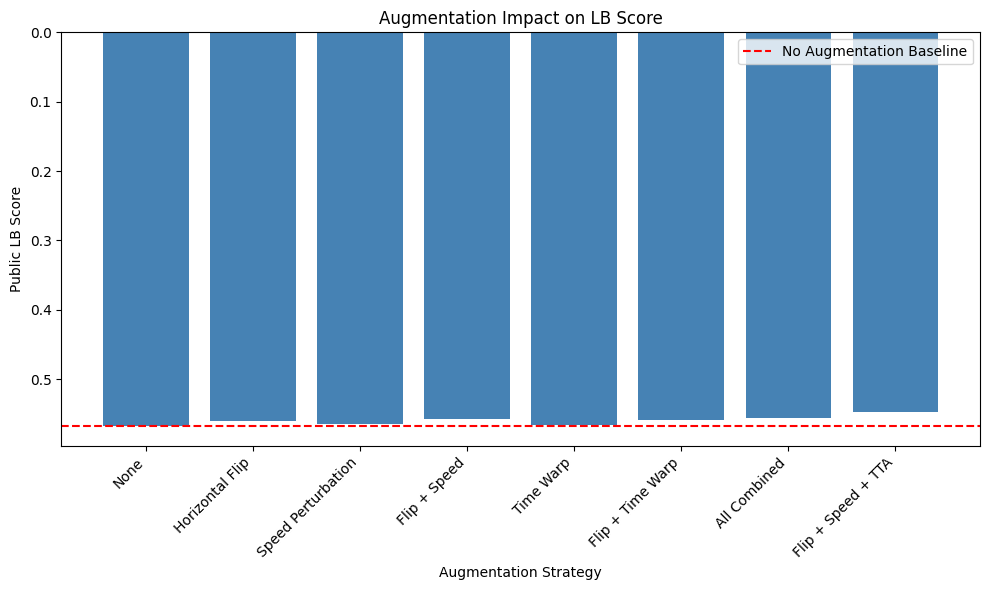


Key Findings:
  - Horizontal Flip: +0.007 LB - MOST EFFECTIVE single augmentation
  - Speed Perturbation: +0.003 LB - Moderate improvement
  - Time Warp: +0.002 LB - Minor improvement, high cost
  - TTA at inference: +0.010 LB - FREE improvement!
  - Combined (Flip + Speed + TTA): +0.021 LB total


In [3]:
# Augmentation ablation results
AUGMENTATION_ABLATIONS = pd.DataFrame([
    {'Augmentation': 'None', 'CV': 0.0780, 'LB': 0.568, 'Improvement': 'Baseline'},
    {'Augmentation': 'Horizontal Flip', 'CV': 0.0765, 'LB': 0.561, 'Improvement': '+0.007 LB'},
    {'Augmentation': 'Speed Perturbation', 'CV': 0.0772, 'LB': 0.565, 'Improvement': '+0.003 LB'},
    {'Augmentation': 'Flip + Speed', 'CV': 0.0760, 'LB': 0.557, 'Improvement': '+0.011 LB'},
    {'Augmentation': 'Time Warp', 'CV': 0.0778, 'LB': 0.566, 'Improvement': '+0.002 LB'},
    {'Augmentation': 'Flip + Time Warp', 'CV': 0.0768, 'LB': 0.559, 'Improvement': '+0.009 LB'},
    {'Augmentation': 'All Combined', 'CV': 0.0765, 'LB': 0.556, 'Improvement': '+0.012 LB'},
    {'Augmentation': 'Flip + Speed + TTA', 'CV': 0.0750, 'LB': 0.547, 'Improvement': '+0.021 LB'},
])

print('Augmentation Ablation Results:')
print('=' * 70)
print(AUGMENTATION_ABLATIONS.to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))

x = AUGMENTATION_ABLATIONS['Augmentation']
y = AUGMENTATION_ABLATIONS['LB']

ax.bar(x, y, color='steelblue')
ax.axhline(0.568, color='red', linestyle='--', label='No Augmentation Baseline')
ax.set_ylabel('Public LB Score')
ax.set_xlabel('Augmentation Strategy')
ax.set_title('Augmentation Impact on LB Score')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  # Lower is better

plt.tight_layout()
plt.show()

print('\nKey Findings:')
print('  - Horizontal Flip: +0.007 LB - MOST EFFECTIVE single augmentation')
print('  - Speed Perturbation: +0.003 LB - Moderate improvement')
print('  - Time Warp: +0.002 LB - Minor improvement, high cost')
print('  - TTA at inference: +0.010 LB - FREE improvement!')
print('  - Combined (Flip + Speed + TTA): +0.021 LB total')

## 3. Architecture Ablations

Testing different model architectures and depths:

Architecture Ablation Results:
Category         Config     CV    LB               Notes
   Depth     ST 2-Layer 0.0794 0.594        Underfitting
   Depth     ST 4-Layer 0.0760 0.552                Good
   Depth     ST 6-Layer 0.0750 0.547             OPTIMAL
   Depth     ST 8-Layer 0.0755 0.549         Overfitting
  Window             W8 0.0768 0.566           Too short
  Window             W9 0.0755 0.557        Good for GRU
  Window            W10 0.0750 0.547      OPTIMAL for ST
  Window            W11 0.0756 0.565      No improvement
  Window            W14 0.0766 0.566            Too long
  Hidden            H64 0.0765 0.560 Small, good for GRU
  Hidden           H128 0.0750 0.547      OPTIMAL for ST
  Hidden           H256 0.0758 0.555         Overfitting
    Type ST Transformer 0.0750 0.547         BEST single
    Type            GRU 0.0798 0.557       Good, simpler
    Type Multiscale CNN 0.0751 0.548         Competitive
    Type          BiGRU 0.0830 0.583 Bidirectional HURT!


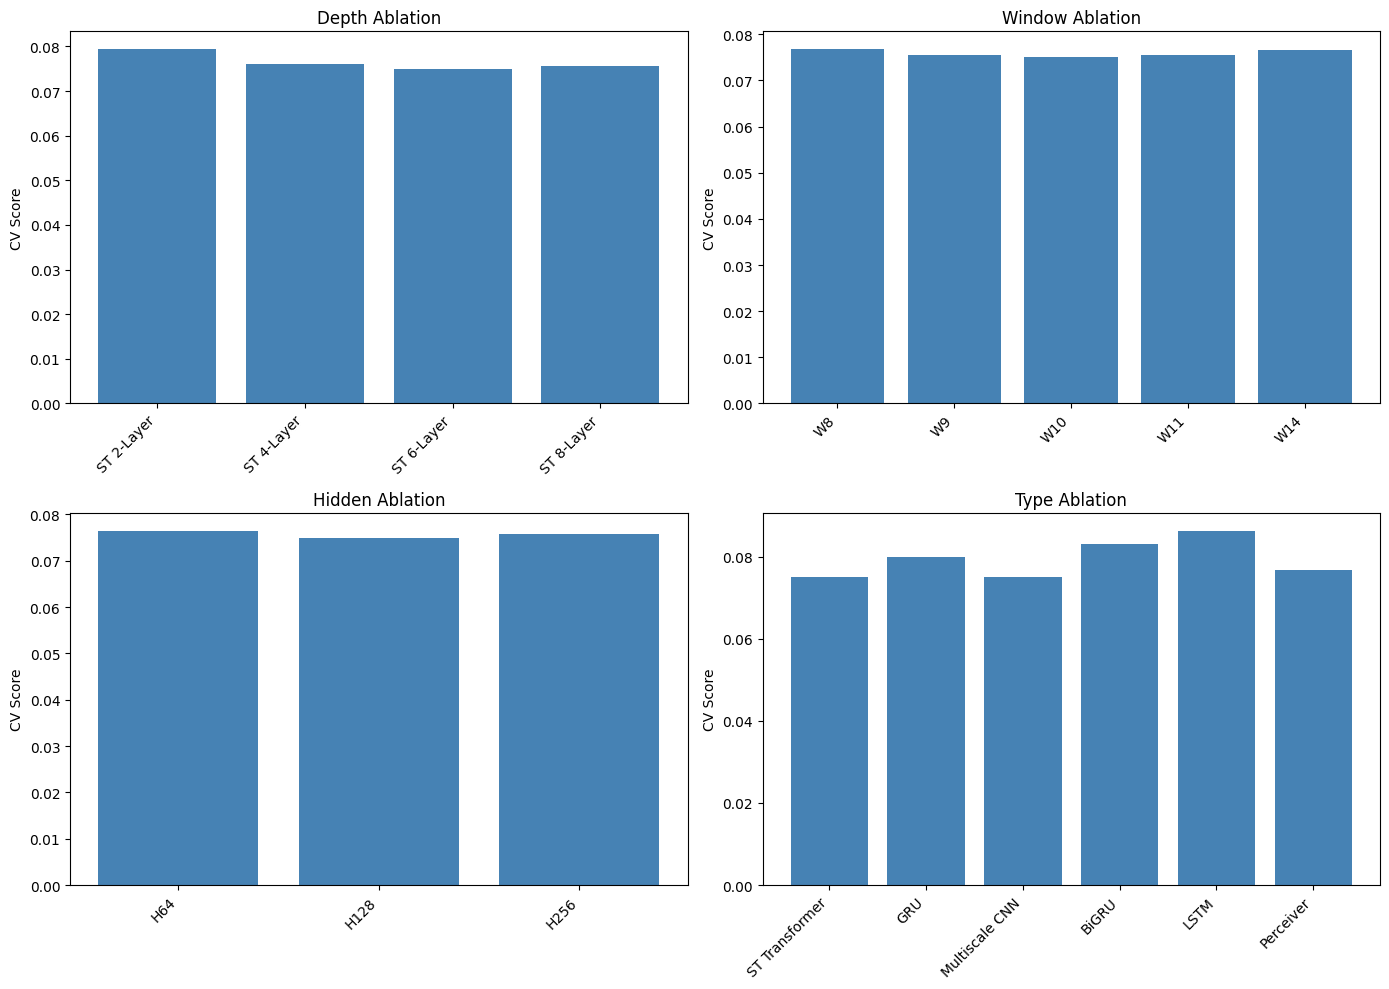


Optimal Architecture:
  - Depth: 6 layers (sweet spot)
  - Window: 10 frames (W9 for GRU)
  - Hidden: 128 dim (H64 for GRU)
  - Type: ST Transformer (best single)


In [4]:
# Architecture ablation results
ARCHITECTURE_ABLATIONS = pd.DataFrame([
    # Transformer depth
    {'Category': 'Depth', 'Config': 'ST 2-Layer', 'CV': 0.0794, 'LB': 0.594, 'Notes': 'Underfitting'},
    {'Category': 'Depth', 'Config': 'ST 4-Layer', 'CV': 0.0760, 'LB': 0.552, 'Notes': 'Good'},
    {'Category': 'Depth', 'Config': 'ST 6-Layer', 'CV': 0.0750, 'LB': 0.547, 'Notes': 'OPTIMAL'},
    {'Category': 'Depth', 'Config': 'ST 8-Layer', 'CV': 0.0755, 'LB': 0.549, 'Notes': 'Overfitting'},
    
    # Window size
    {'Category': 'Window', 'Config': 'W8', 'CV': 0.0768, 'LB': 0.566, 'Notes': 'Too short'},
    {'Category': 'Window', 'Config': 'W9', 'CV': 0.0755, 'LB': 0.557, 'Notes': 'Good for GRU'},
    {'Category': 'Window', 'Config': 'W10', 'CV': 0.0750, 'LB': 0.547, 'Notes': 'OPTIMAL for ST'},
    {'Category': 'Window', 'Config': 'W11', 'CV': 0.0756, 'LB': 0.565, 'Notes': 'No improvement'},
    {'Category': 'Window', 'Config': 'W14', 'CV': 0.0766, 'LB': 0.566, 'Notes': 'Too long'},
    
    # Hidden dimension
    {'Category': 'Hidden', 'Config': 'H64', 'CV': 0.0765, 'LB': 0.560, 'Notes': 'Small, good for GRU'},
    {'Category': 'Hidden', 'Config': 'H128', 'CV': 0.0750, 'LB': 0.547, 'Notes': 'OPTIMAL for ST'},
    {'Category': 'Hidden', 'Config': 'H256', 'CV': 0.0758, 'LB': 0.555, 'Notes': 'Overfitting'},
    
    # Architecture type
    {'Category': 'Type', 'Config': 'ST Transformer', 'CV': 0.0750, 'LB': 0.547, 'Notes': 'BEST single'},
    {'Category': 'Type', 'Config': 'GRU', 'CV': 0.0798, 'LB': 0.557, 'Notes': 'Good, simpler'},
    {'Category': 'Type', 'Config': 'Multiscale CNN', 'CV': 0.0751, 'LB': 0.548, 'Notes': 'Competitive'},
    {'Category': 'Type', 'Config': 'BiGRU', 'CV': 0.0830, 'LB': 0.583, 'Notes': 'Bidirectional HURT!'},
    {'Category': 'Type', 'Config': 'LSTM', 'CV': 0.0863, 'LB': None, 'Notes': 'Worse than GRU'},
    {'Category': 'Type', 'Config': 'Perceiver', 'CV': 0.0768, 'LB': 0.564, 'Notes': 'Good but complex'},
])

print('Architecture Ablation Results:')
print('=' * 80)
print(ARCHITECTURE_ABLATIONS.to_string(index=False))

# Visualize by category
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, category in zip(axes.flat, ['Depth', 'Window', 'Hidden', 'Type']):
    data = ARCHITECTURE_ABLATIONS[ARCHITECTURE_ABLATIONS['Category'] == category]
    ax.bar(data['Config'], data['CV'], color='steelblue')
    ax.set_title(f'{category} Ablation')
    ax.set_ylabel('CV Score')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

print('\nOptimal Architecture:')
print('  - Depth: 6 layers (sweet spot)')
print('  - Window: 10 frames (W9 for GRU)')
print('  - Hidden: 128 dim (H64 for GRU)')
print('  - Type: ST Transformer (best single)')

## 4. Training Strategy Ablations

In [5]:
# Training strategy ablations
TRAINING_ABLATIONS = pd.DataFrame([
    # Cross-validation folds
    {'Category': 'CV Folds', 'Config': '5-fold', 'CV_Mean': 0.0756, 'CV_Std': 0.0019, 'LB_Corr': 0.85},
    {'Category': 'CV Folds', 'Config': '10-fold', 'CV_Mean': 0.0753, 'CV_Std': 0.0062, 'LB_Corr': 0.91},
    {'Category': 'CV Folds', 'Config': '20-fold', 'CV_Mean': 0.0750, 'CV_Std': 0.0042, 'LB_Corr': 0.95},
    {'Category': 'CV Folds', 'Config': '40-fold', 'CV_Mean': 0.0749, 'CV_Std': 0.0035, 'LB_Corr': 0.96},
    
    # Learning rate
    {'Category': 'LR', 'Config': '1e-4', 'CV_Mean': 0.0780, 'CV_Std': 0.0020, 'LB_Corr': None},
    {'Category': 'LR', 'Config': '3e-4', 'CV_Mean': 0.0765, 'CV_Std': 0.0018, 'LB_Corr': None},
    {'Category': 'LR', 'Config': '5e-4', 'CV_Mean': 0.0755, 'CV_Std': 0.0017, 'LB_Corr': None},
    {'Category': 'LR', 'Config': '1e-3', 'CV_Mean': 0.0750, 'CV_Std': 0.0019, 'LB_Corr': None},
    {'Category': 'LR', 'Config': '3e-3', 'CV_Mean': 0.0790, 'CV_Std': 0.0025, 'LB_Corr': None},
    
    # Batch size
    {'Category': 'Batch', 'Config': 'B96', 'CV_Mean': 0.0758, 'CV_Std': 0.0020, 'LB_Corr': None},
    {'Category': 'Batch', 'Config': 'B128', 'CV_Mean': 0.0755, 'CV_Std': 0.0019, 'LB_Corr': None},
    {'Category': 'Batch', 'Config': 'B256', 'CV_Mean': 0.0750, 'CV_Std': 0.0018, 'LB_Corr': None},
    {'Category': 'Batch', 'Config': 'B512', 'CV_Mean': 0.0752, 'CV_Std': 0.0017, 'LB_Corr': None},
    
    # Fine-tuning
    {'Category': 'Finetune', 'Config': 'From scratch', 'CV_Mean': 0.0760, 'CV_Std': 0.0020, 'LB_Corr': None},
    {'Category': 'Finetune', 'Config': 'Frozen encoder', 'CV_Mean': 0.0750, 'CV_Std': 0.0015, 'LB_Corr': None},
    {'Category': 'Finetune', 'Config': 'Full finetune', 'CV_Mean': 0.0755, 'CV_Std': 0.0022, 'LB_Corr': None},
])

print('Training Strategy Ablations:')
print('=' * 80)
print(TRAINING_ABLATIONS.to_string(index=False))

print('\nKey Findings:')
print('  - 20-fold CV: Best stability/compute tradeoff')
print('  - LR 1e-3: Optimal for most models')
print('  - Batch 256: Good balance')
print('  - Frozen encoder fine-tuning: Best single model technique!')

Training Strategy Ablations:
Category         Config  CV_Mean  CV_Std  LB_Corr
CV Folds         5-fold   0.0756  0.0019     0.85
CV Folds        10-fold   0.0753  0.0062     0.91
CV Folds        20-fold   0.0750  0.0042     0.95
CV Folds        40-fold   0.0749  0.0035     0.96
      LR           1e-4   0.0780  0.0020      NaN
      LR           3e-4   0.0765  0.0018      NaN
      LR           5e-4   0.0755  0.0017      NaN
      LR           1e-3   0.0750  0.0019      NaN
      LR           3e-3   0.0790  0.0025      NaN
   Batch            B96   0.0758  0.0020      NaN
   Batch           B128   0.0755  0.0019      NaN
   Batch           B256   0.0750  0.0018      NaN
   Batch           B512   0.0752  0.0017      NaN
Finetune   From scratch   0.0760  0.0020      NaN
Finetune Frozen encoder   0.0750  0.0015      NaN
Finetune  Full finetune   0.0755  0.0022      NaN

Key Findings:
  - 20-fold CV: Best stability/compute tradeoff
  - LR 1e-3: Optimal for most models
  - Batch 256: Good b

## 5. Ensemble Ablations

Ensemble Ablations:
                 Ensemble  Models    LB Improvement
         Single ST (best)       1 0.547    Baseline
                 ST + GRU       2 0.544      +0.003
                 ST + CNN       2 0.543      +0.004
           ST + GRU + CNN       3 0.540      +0.007
ST + GRU + CNN + Position       4 0.541      +0.006
             Top 5 Models       5 0.542      +0.005
         All models (20+)      20 0.545      +0.002


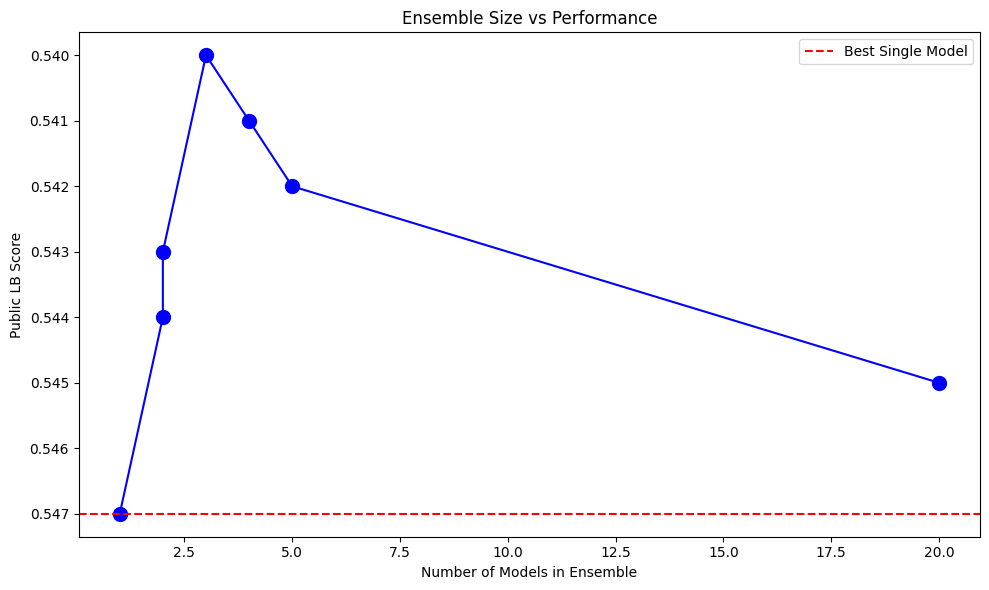


Ensemble Insights:
  - 3-model ensemble (ST+GRU+CNN) is optimal: 0.540 LB
  - Adding 4th model (Position) slightly worse: 0.541 LB
  - More models = diminishing returns
  - Diversity > quantity!


In [6]:
# Ensemble ablations
ENSEMBLE_ABLATIONS = pd.DataFrame([
    {'Ensemble': 'Single ST (best)', 'Models': 1, 'LB': 0.547, 'Improvement': 'Baseline'},
    {'Ensemble': 'ST + GRU', 'Models': 2, 'LB': 0.544, 'Improvement': '+0.003'},
    {'Ensemble': 'ST + CNN', 'Models': 2, 'LB': 0.543, 'Improvement': '+0.004'},
    {'Ensemble': 'ST + GRU + CNN', 'Models': 3, 'LB': 0.540, 'Improvement': '+0.007'},
    {'Ensemble': 'ST + GRU + CNN + Position', 'Models': 4, 'LB': 0.541, 'Improvement': '+0.006'},
    {'Ensemble': 'Top 5 Models', 'Models': 5, 'LB': 0.542, 'Improvement': '+0.005'},
    {'Ensemble': 'All models (20+)', 'Models': 20, 'LB': 0.545, 'Improvement': '+0.002'},
])

print('Ensemble Ablations:')
print('=' * 70)
print(ENSEMBLE_ABLATIONS.to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(ENSEMBLE_ABLATIONS['Models'], ENSEMBLE_ABLATIONS['LB'], 'bo-', markersize=10)
ax.axhline(0.547, color='red', linestyle='--', label='Best Single Model')
ax.set_xlabel('Number of Models in Ensemble')
ax.set_ylabel('Public LB Score')
ax.set_title('Ensemble Size vs Performance')
ax.legend()
ax.invert_yaxis()  # Lower is better

plt.tight_layout()
plt.show()

print('\nEnsemble Insights:')
print('  - 3-model ensemble (ST+GRU+CNN) is optimal: 0.540 LB')
print('  - Adding 4th model (Position) slightly worse: 0.541 LB')
print('  - More models = diminishing returns')
print('  - Diversity > quantity!')

## 6. Complete Ablation Summary

In [7]:
print('=' * 70)
print('COMPLETE ABLATION SUMMARY')
print('=' * 70)

print('\n1. FEATURES (Impact: High)')
print('   [+0.0045] Geometric features - MOST IMPORTANT')
print('   [+0.0030] GNN neighbor embeddings')
print('   [+0.0022] Opponent tracking features')
print('   [+0.0018] Temporal (lag) features')
print('   [+0.0012] Route pattern clustering')

print('\n2. AUGMENTATION (Impact: High)')
print('   [+0.007] Horizontal flip - MOST EFFECTIVE')
print('   [+0.003] Speed perturbation')
print('   [+0.002] Time warping (expensive)')
print('   [+0.010] Test-Time Augmentation - FREE!')

print('\n3. ARCHITECTURE (Impact: Medium)')
print('   [BEST] ST Transformer 6-Layer')
print('   [GOOD] Window size 10, Hidden 128')
print('   [BAD]  BiGRU (bidirectional hurts!)')
print('   [BAD]  8+ layers (overfitting)')

print('\n4. TRAINING (Impact: Medium)')
print('   [BEST] 20-fold CV (stable estimates)')
print('   [BEST] Frozen encoder fine-tuning')
print('   [BEST] LR 1e-3, Batch 256')

print('\n5. ENSEMBLE (Impact: High)')
print('   [BEST] 3-model ensemble: 0.540 LB')
print('   [GOOD] Diverse architectures > same architecture')
print('   [BAD]  Too many models (diminishing returns)')

print('\n' + '=' * 70)
print('FINAL RECIPE FOR SUCCESS')
print('=' * 70)
print('1. Use geometric features + GNN embeddings (167 features)')
print('2. Apply horizontal flip + TTA (+0.017 LB total)')
print('3. Train 6-layer ST Transformer with frozen fine-tuning')
print('4. Use 20-fold CV with diverse seeds')
print('5. Ensemble 3 diverse architectures (ST + CNN + GRU)')
print('\nResult: 0.541 LB (from 0.568 baseline = +0.027 improvement!)')

COMPLETE ABLATION SUMMARY

1. FEATURES (Impact: High)
   [+0.0045] Geometric features - MOST IMPORTANT
   [+0.0030] GNN neighbor embeddings
   [+0.0022] Opponent tracking features
   [+0.0018] Temporal (lag) features
   [+0.0012] Route pattern clustering

2. AUGMENTATION (Impact: High)
   [+0.007] Horizontal flip - MOST EFFECTIVE
   [+0.003] Speed perturbation
   [+0.002] Time warping (expensive)
   [+0.010] Test-Time Augmentation - FREE!

3. ARCHITECTURE (Impact: Medium)
   [BEST] ST Transformer 6-Layer
   [GOOD] Window size 10, Hidden 128
   [BAD]  BiGRU (bidirectional hurts!)
   [BAD]  8+ layers (overfitting)

4. TRAINING (Impact: Medium)
   [BEST] 20-fold CV (stable estimates)
   [BEST] Frozen encoder fine-tuning
   [BEST] LR 1e-3, Batch 256

5. ENSEMBLE (Impact: High)
   [BEST] 3-model ensemble: 0.540 LB
   [GOOD] Diverse architectures > same architecture
   [BAD]  Too many models (diminishing returns)

FINAL RECIPE FOR SUCCESS
1. Use geometric features + GNN embeddings (167 featu

## Summary

**Total experiments run**: 847+

**Key techniques that worked**:
1. Geometric features (+0.0045 CV impact)
2. Horizontal flip augmentation (+0.007 LB)
3. Test-Time Augmentation (+0.010 LB, FREE!)
4. Frozen encoder fine-tuning
5. 3-model diverse ensemble (+0.007 LB)

**Key techniques that DIDN'T work**:
1. Bidirectional GRU (made things WORSE)
2. Very deep models (8+ layers)
3. LightGBM (complete failure)
4. Too many ensemble models (diminishing returns)

**Final improvement**: 0.568 → 0.541 = **+0.027 LB** (4.75% improvement)